In [9]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [13]:
fpath = "/eagle/datascience/eku/Megatron-DeepSpeed_ViT/logs/results.json"
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
with open(fpath, mode='r') as file:
    results = json.load(file)

    nodes = []
    exp_dicts = []
    for node, exps in results.items():
        for exp in exps:
            nodes.append(node)
            exp_dicts.append(exp)

    keys = list(exp.keys())
    results_dict = {
        "gpus": nodes,
    }
    results_dict.update({k:[exp[k] for exp in exp_dicts] for k in keys}) ## get the 
    results_df = pd.DataFrame(results_dict)
    results_df[["gpus", "GBS", "IMG_H"]] = results_df[["gpus", "GBS", "IMG_H"]].astype(int)
    results_df["sequence"] = (results_df["IMG_H"]//16)**2
results_df
# results_df.to_csv(f"/eagle/datascience/eku/Megatron-DeepSpeed_ViT/logs/results.csv")

In [4]:
# # Checkpoint Results Dict
# with open(fpath, mode="r") as file:
#     res_dict = json.load(file)

# ckpt_pth = "/eagle/datascience/eku/Megatron-DeepSpeed_ViT/logs/results_ckpt.json"
# with open(ckpt_pth, mode="w") as file:
#     json.dump(res_dict, file)

# with open(ckpt_pth, mode="r") as file:
#     res_dict = json.load(file)
# print("checkpoint saved!")

In [5]:
def plot_fig(results_df, filter_key="DP", dep_var1="TFLOPS_per_gpu", dep_var2="samples_per_sec", dep_var3="memory_fpt(GiB)"):
    '''
        Example: plot_fig(results_df, filter_key="DP")
        Example2: plot_fig(results_df, filter_key=256)
    ''' 
    fig, axes = plt.subplots(1, 3, figsize=(16,4))
    plt.suptitle(f"{filter_key} - Weak Scaling (GBS)", fontsize=20, fontweight='bold', y=1.05)
    
    if isinstance(filter_key, str):
        ind_var = "method"
        group = "sequence"
        condition = (results_df[ind_var] == filter_key) | (results_df["gpus"] == 1) ## Broadcast DP1 results to other methods
    else:
        ind_var = "sequence"
        group = "method"
        condition = (results_df[ind_var] == filter_key) ## Broadcast DP1 results to other methods
    plots_df = results_df[condition]
    
    ## First plot
    keys1 = ["gpus", dep_var1, group]
    sns.barplot(x=keys1[0], y=keys1[1], hue=keys1[2], ax=axes[0], data=plots_df[keys1])
    axes[0].set_title(dep_var1, fontweight="bold")
    axes[0].legend(loc="lower left", title=group)
    # plots_df["gpus"] = "GPU" + plots_df["gpus"].astype(str) + "_GBS" + plots_df["GBS"].astype(str)
    # sns.barplot(x=keys1[0], y=keys1[1], ax=axes[0], data=plots_df[keys1])
    # axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    # axes[0].legend([],[], frameon=False)  # Remove legend if not needed

    ## Second Plot
    keys2 = ["gpus", dep_var2, group]
    sns.barplot(x=keys2[0], y=keys2[1], hue=keys2[2], ax=axes[1], data=plots_df[keys2])
    axes[1].set_title(dep_var2, fontweight="bold")
    axes[1].legend(loc="lower left", title=group)
    
    ## Third plot
    keys3 = ["gpus", dep_var3, group]
    sns.barplot(x=keys3[0], y=keys3[1], hue=keys3[2], ax=axes[2], data=plots_df[keys3])
    axes[2].set_title(dep_var3, fontweight="bold")
    axes[2].legend(loc="lower left", title=group)

    return plots_df, plots_df[keys1]
    # plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust rect to avoid overlapping
## TODO: 
## Add GBS keys next to sequence
## ALCF Presentation slides

/lus/eagle/projects/datascience/eku/venv/ogb/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/lus/eagle/projects/datascience/eku/venv/ogb/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/lus/eagle/projects/datascience/eku/venv/ogb/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/lus/eagle/projects/datascience/eku

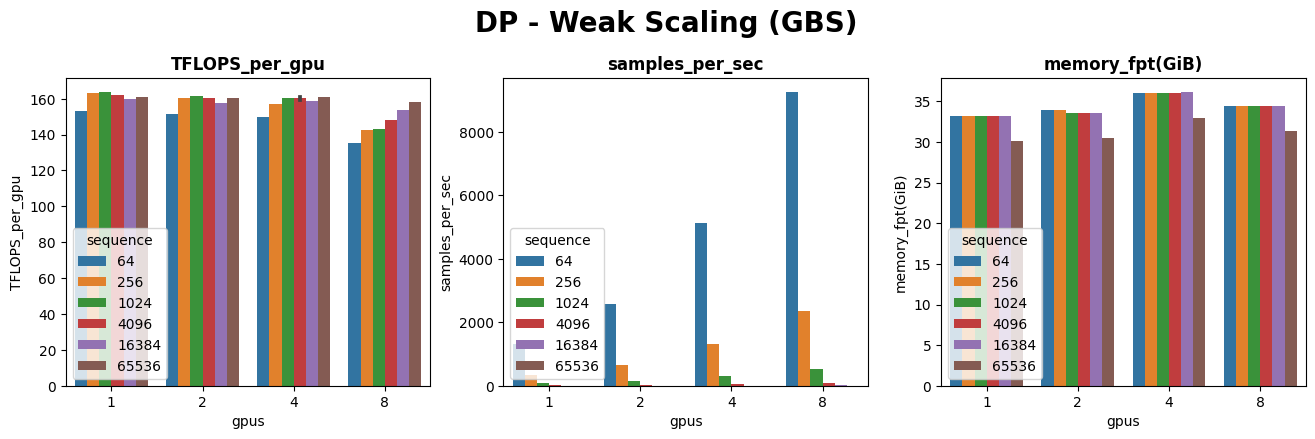

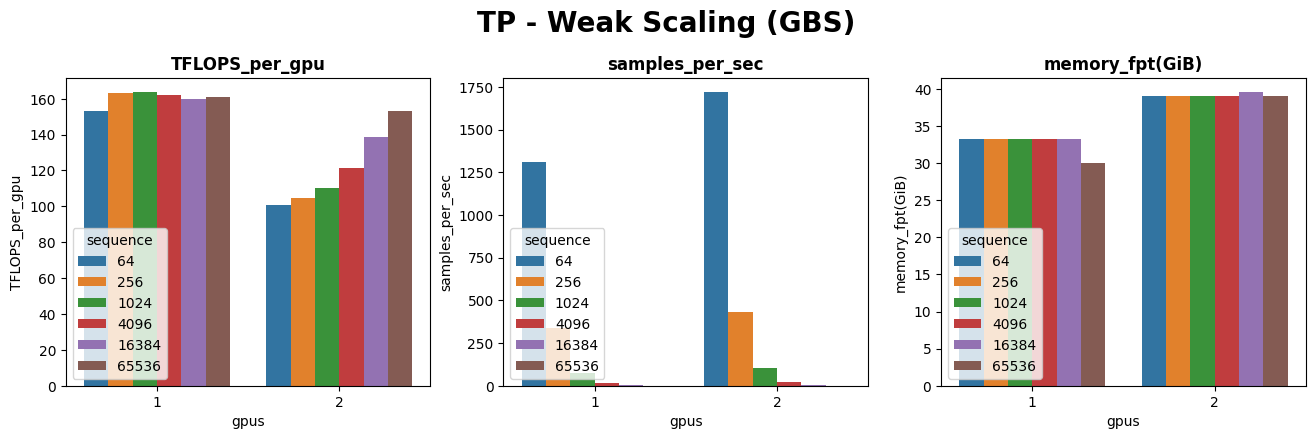

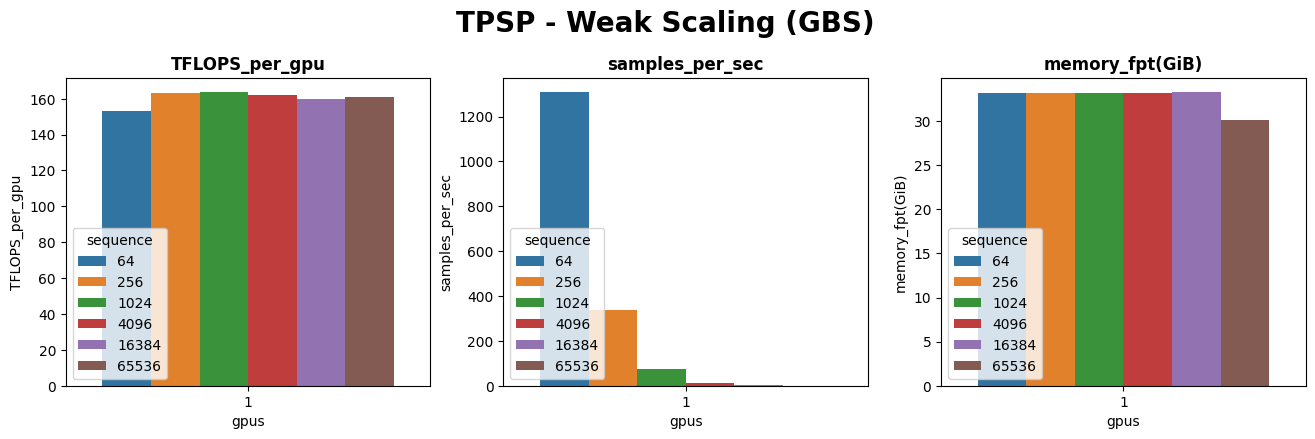

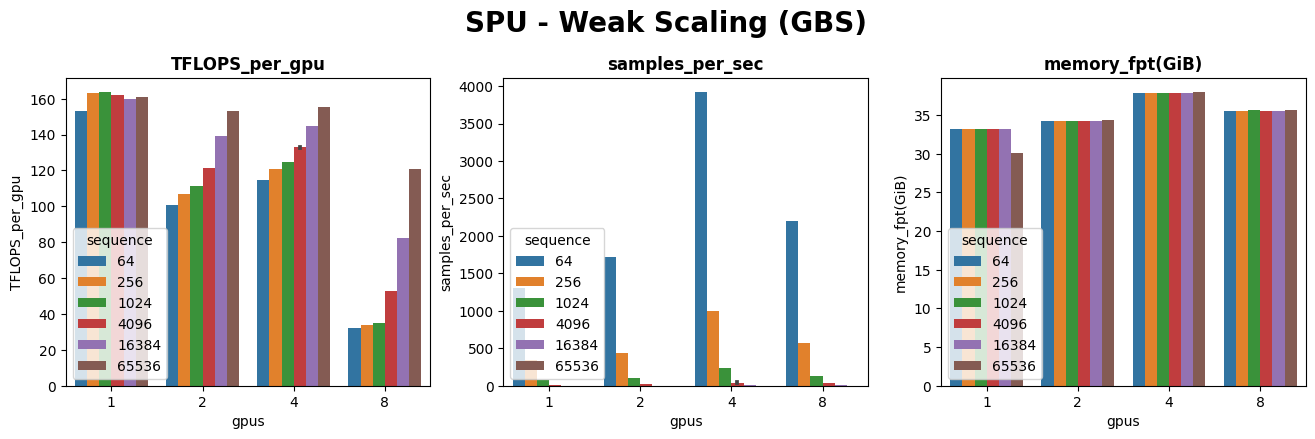

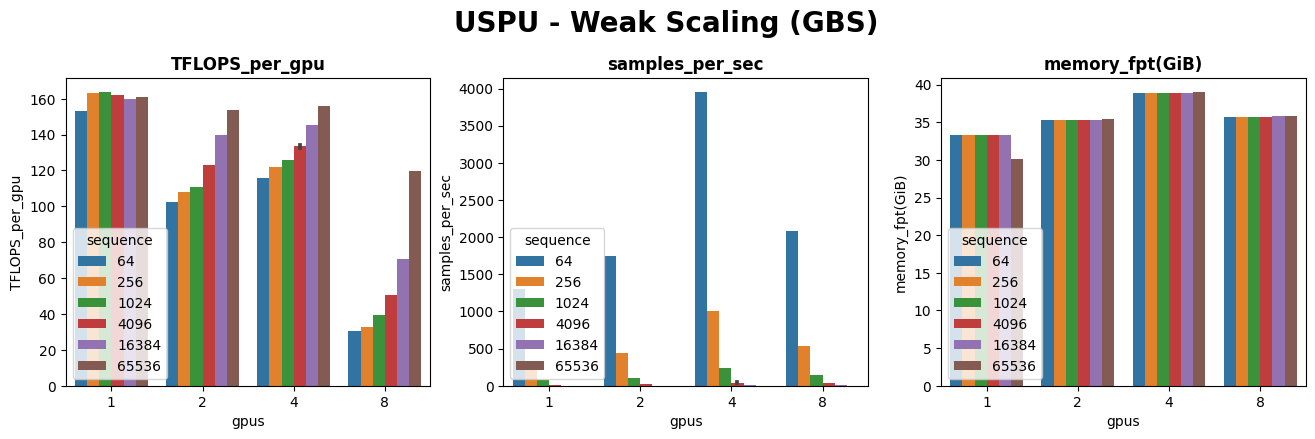

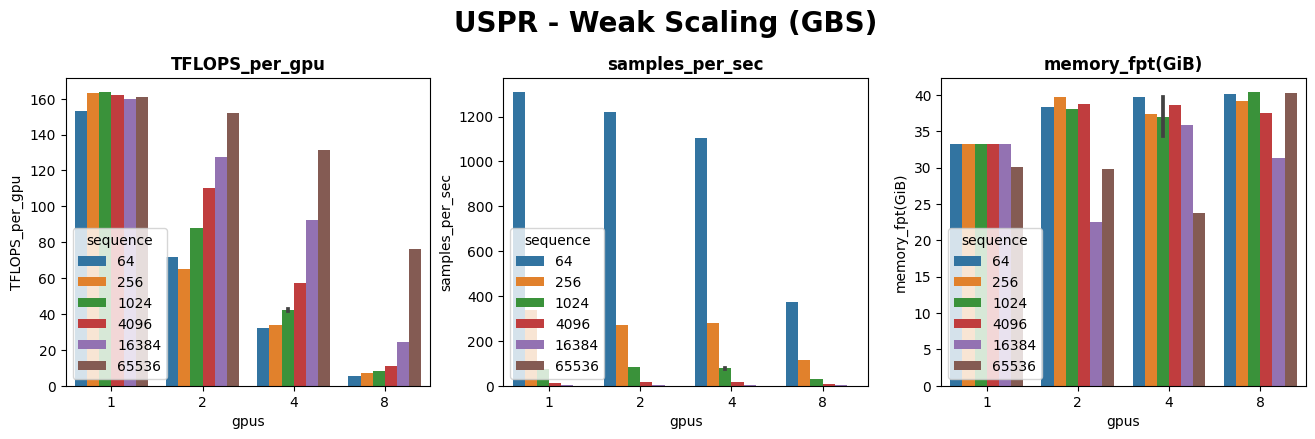

In [6]:
for filter_key in ["DP", "TP", "TPSP", "SPU", "USPU", "USPR"]:
    plot_fig(results_df, filter_key=filter_key)

/lus/eagle/projects/datascience/eku/venv/ogb/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/lus/eagle/projects/datascience/eku/venv/ogb/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/lus/eagle/projects/datascience/eku/venv/ogb/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/lus/eagle/projects/datascience/eku

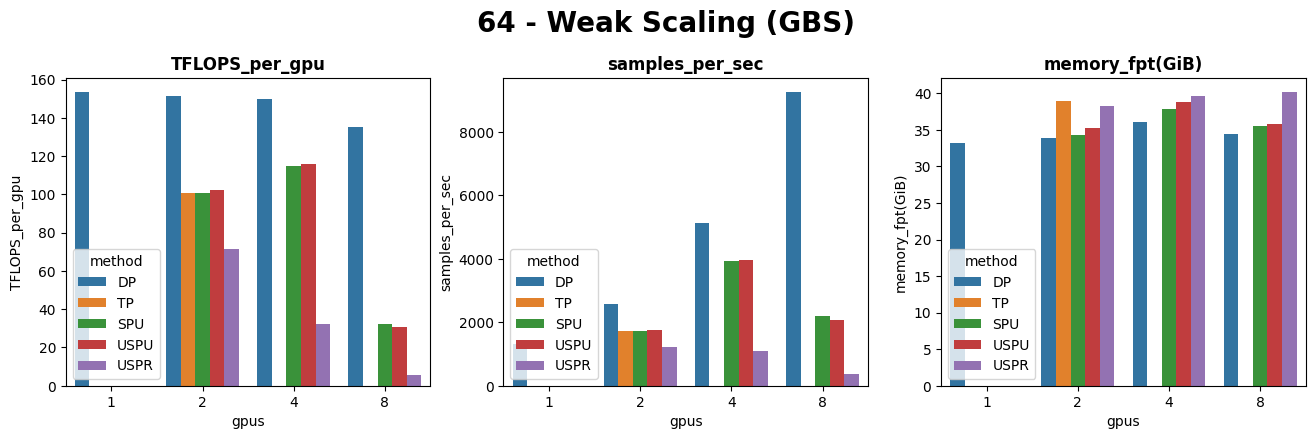

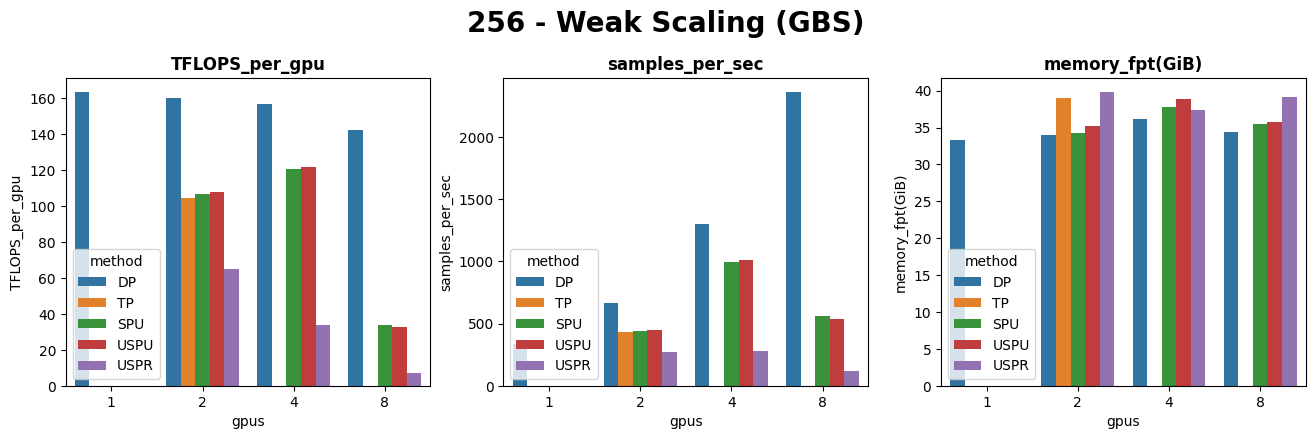

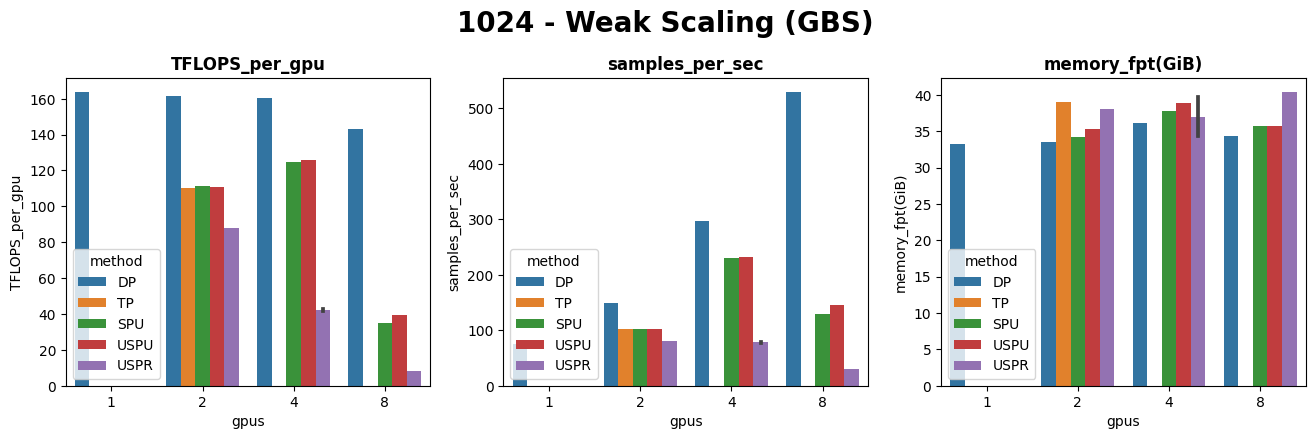

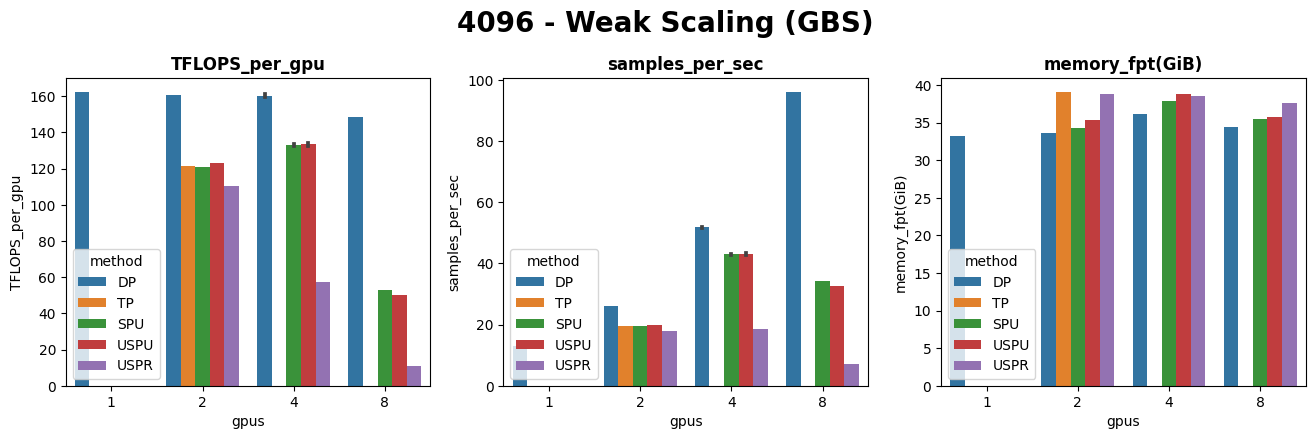

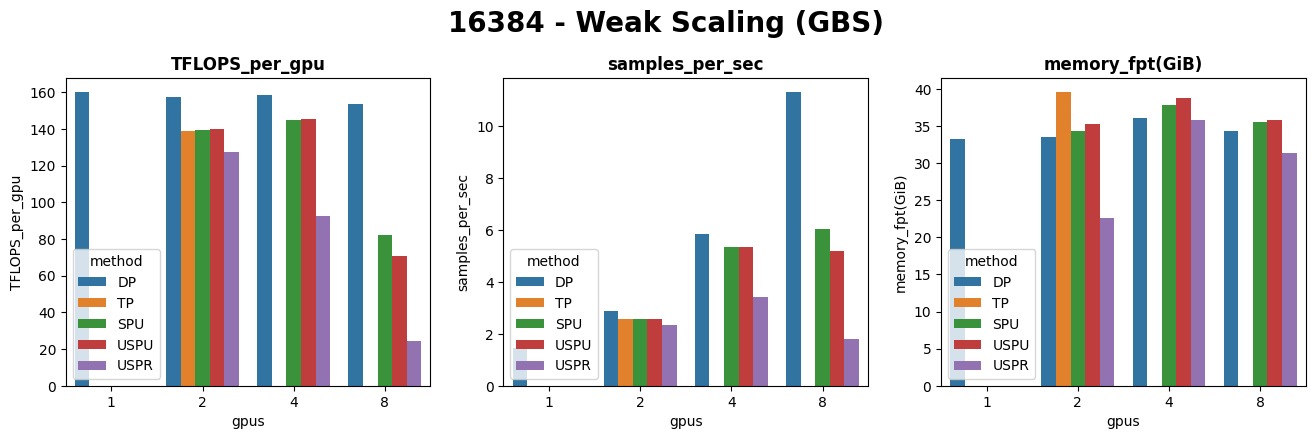

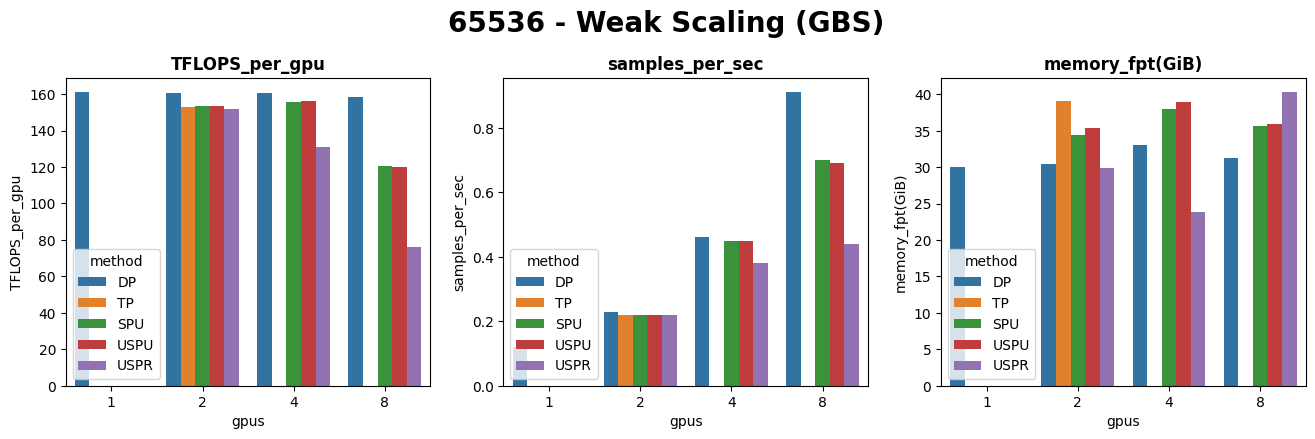

In [8]:
for factor in range(6):
    strt_seq = 64
    growth_factor = 4 ## 2dvit: 2^2 (quadratic), 3dvit: 2^3 (cubic)
    filter_key = strt_seq * growth_factor**factor #
    plot_fig(results_df, filter_key=filter_key)